# Importing libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15, 10)})
from sklearn.preprocessing import LabelEncoder

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cardio-good-fitness/CardioGoodFitness.csv


# Importing Data

In [2]:
df = pd.read_csv('/kaggle/input/cardio-good-fitness/CardioGoodFitness.csv')
display(df)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120


# Basic Data Visualization

Text(0.5, 1.0, 'Product Distribution')

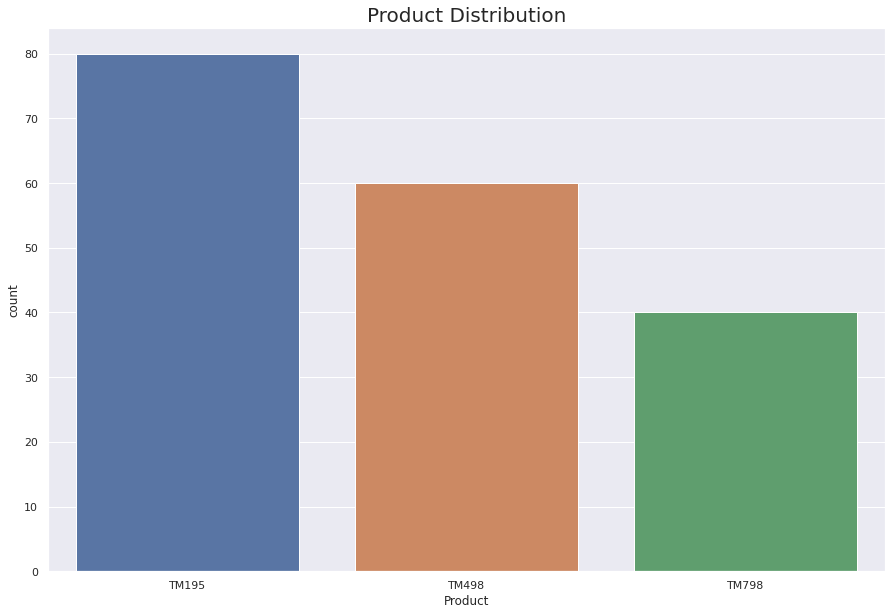

In [3]:
plot = sns.countplot(x ='Product', data = df)
plot.axes.set_title("Product Distribution",fontsize=20)

Text(0.5, 1.0, 'Age Distribution')

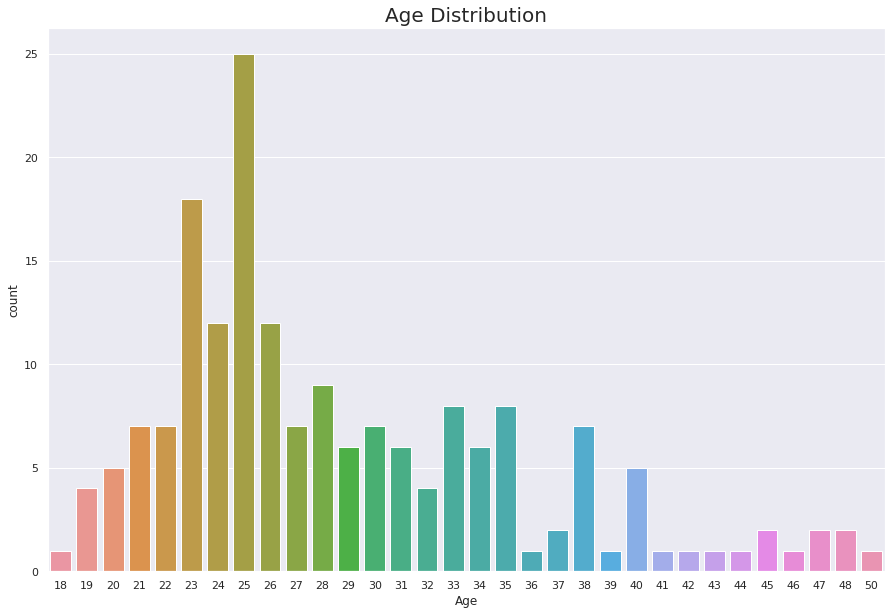

In [4]:
plot = sns.countplot(x ='Age', data = df)
plot.axes.set_title("Age Distribution", fontsize=20)

#### This is telling of how old our customers mostly are. 
#### As this is a treadmill product that requires a certain fitness level to use, most of our users are in their mid twenties. 
#### We still see substantial amount of users till their mid thirties but dwindle down from then onwards.

Text(0.5, 1.0, 'Gender Distribution')

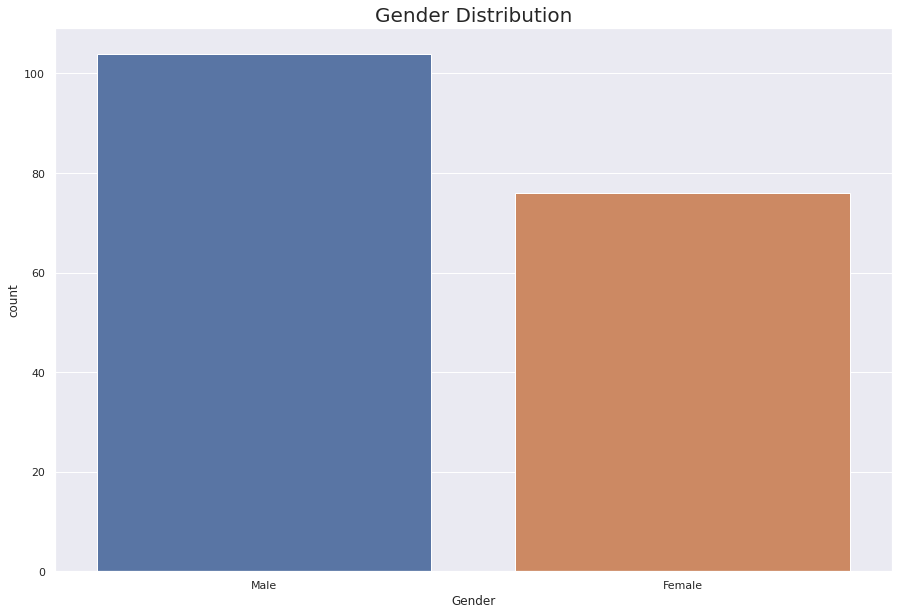

In [5]:
plot = sns.countplot(x ='Gender', data = df)
plot.axes.set_title("Gender Distribution", fontsize=20)

Text(0.5, 1.0, 'Education Distribution')

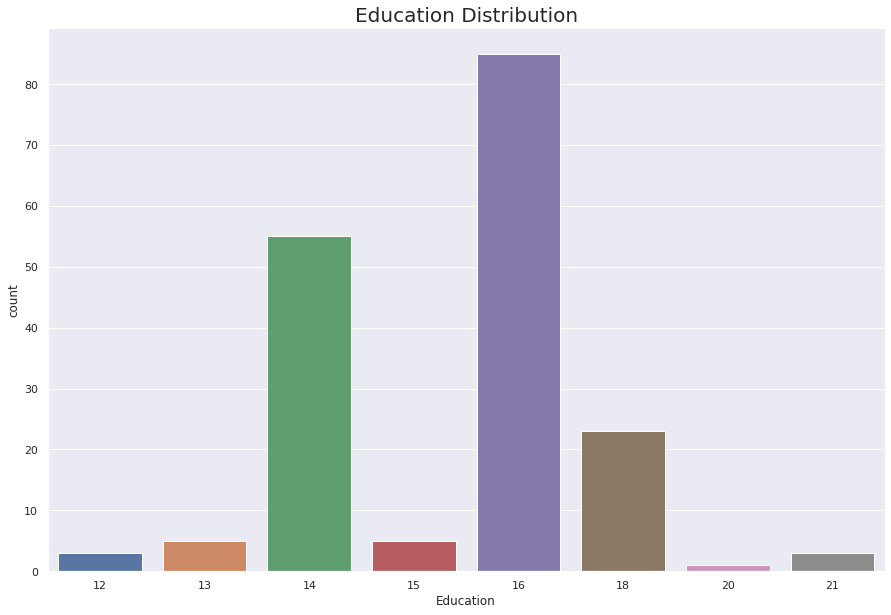

In [6]:
plot = sns.countplot(x ='Education', data = df)
plot.axes.set_title("Education Distribution", fontsize=20)

Text(0.5, 1.0, 'MaritalStatus Distribution')

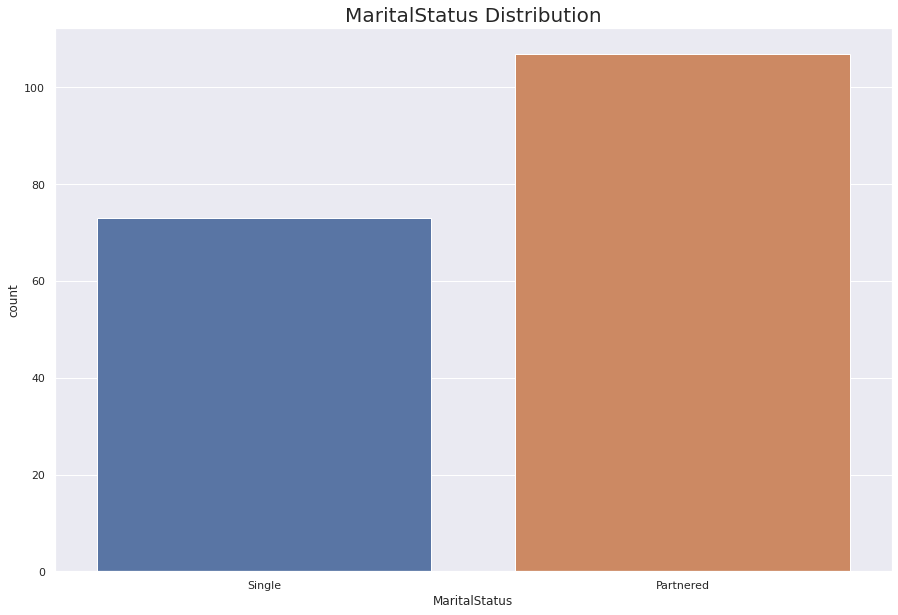

In [7]:
plot = sns.countplot(x ='MaritalStatus', data = df)
plot.axes.set_title("MaritalStatus Distribution", fontsize=20)

Text(0.5, 1.0, 'Usage Distribution')

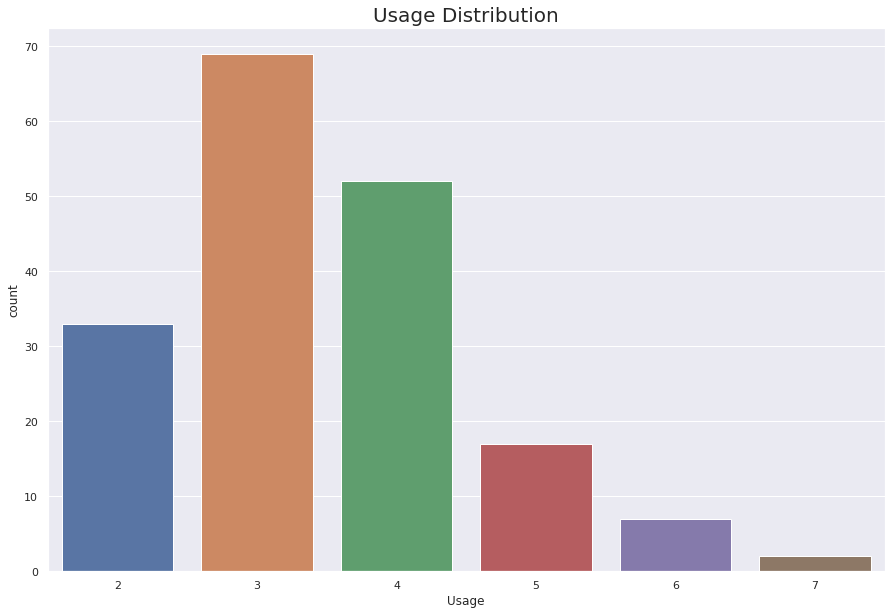

In [8]:
plot = sns.countplot(x ='Usage', data = df)
plot.axes.set_title("Usage Distribution", fontsize=20)

Text(0.5, 1.0, 'Fitness Distribution')

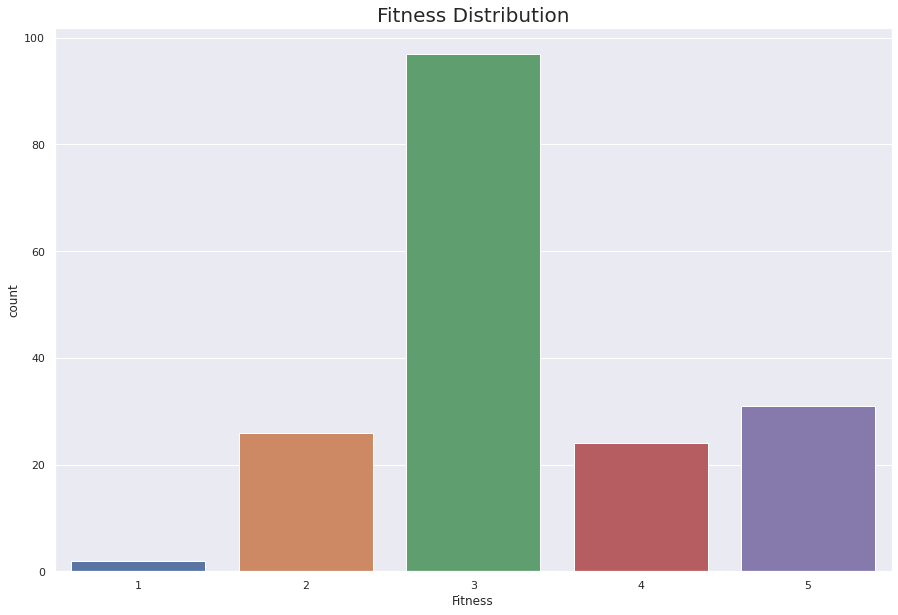

In [9]:
plot = sns.countplot(x ='Fitness', data = df)
plot.axes.set_title("Fitness Distribution", fontsize=20)

### We can observe that this is a very uneven and probably biased distribution of fitness level. Studying any correlation or effects using the fitness attribute would most definitely contain biased and incomplete information in our work. 
### To counter this problem, I would suggest we sample more from other participants with fitness level other than 3.

Text(0.5, 1.0, 'Income Distribution')

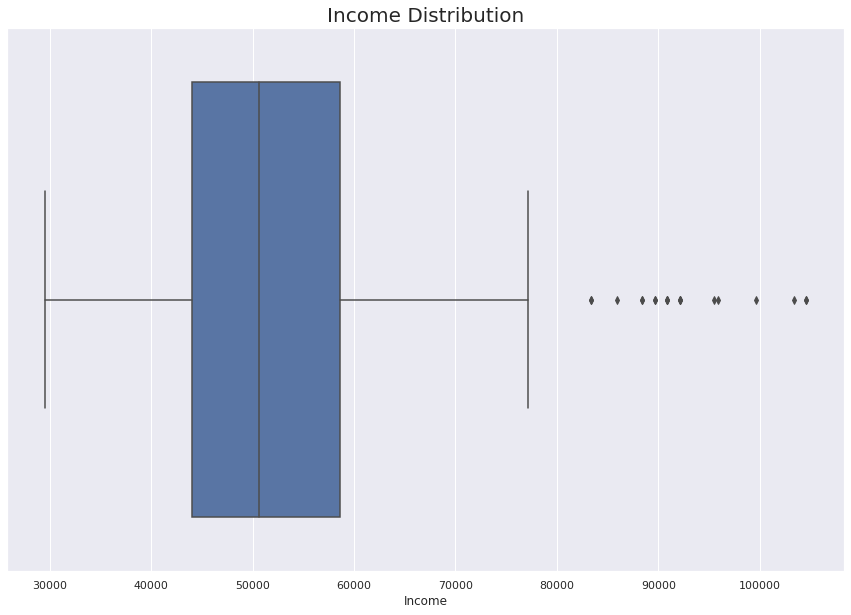

In [10]:
plot = sns.boxplot(x=df['Income'])
plot.axes.set_title("Income Distribution", fontsize=20)

#### This is an important feature to look at from the business perspective. 
#### We can tell that our product is mostly used by people with an income around 50,000 dollars. 
#### Although there are outliers with 6 figure salaries, it is safe to say that most of our users between 45,000 to 58,000 in income.
#### The important point we have to keep in mind is that most of our customers are in their mid twenties.
#### Therefore, we cannot be expecting such high income levels from them.

Text(0.5, 1.0, 'Miles Distribution')

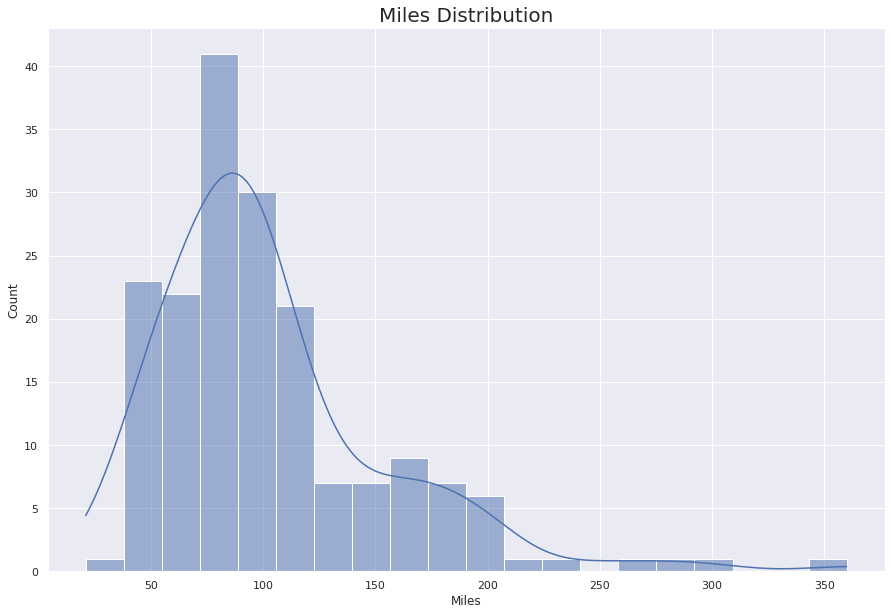

In [11]:
plot = sns.histplot(data=df, x="Miles",kde=True)
plot.axes.set_title("Miles Distribution", fontsize=20)

# Deeper Data Exploration

### Label Encoding

In [12]:
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [13]:
df_catagorical=df.select_dtypes(include=['object'])
display(df_catagorical)

,Product,Gender,MaritalStatus
0,TM195,Male,Single
1,TM195,Male,Single
2,TM195,Female,Partnered
3,TM195,Male,Single
4,TM195,Male,Partnered
...,...,...,...
175,TM798,Male,Single
176,TM798,Male,Single
177,TM798,Male,Single
178,TM798,Male,Partnered


In [14]:
le = LabelEncoder()

for feat in df_catagorical.columns:
    df[feat] = le.fit_transform(df[feat].astype(str))
    
display(df)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,0,18,1,14,1,3,4,29562,112
1,0,19,1,15,1,2,3,31836,75
2,0,19,0,14,0,4,3,30699,66
3,0,19,1,12,1,3,3,32973,85
4,0,20,1,13,0,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,2,40,1,21,1,6,5,83416,200
176,2,42,1,18,1,5,4,89641,200
177,2,45,1,16,1,5,5,90886,160
178,2,47,1,18,0,4,5,104581,120


In [15]:
df.dtypes

Product          int64
Age              int64
Gender           int64
Education        int64
MaritalStatus    int64
Usage            int64
Fitness          int64
Income           int64
Miles            int64
dtype: object

### Correlation Heatmap

<AxesSubplot:>

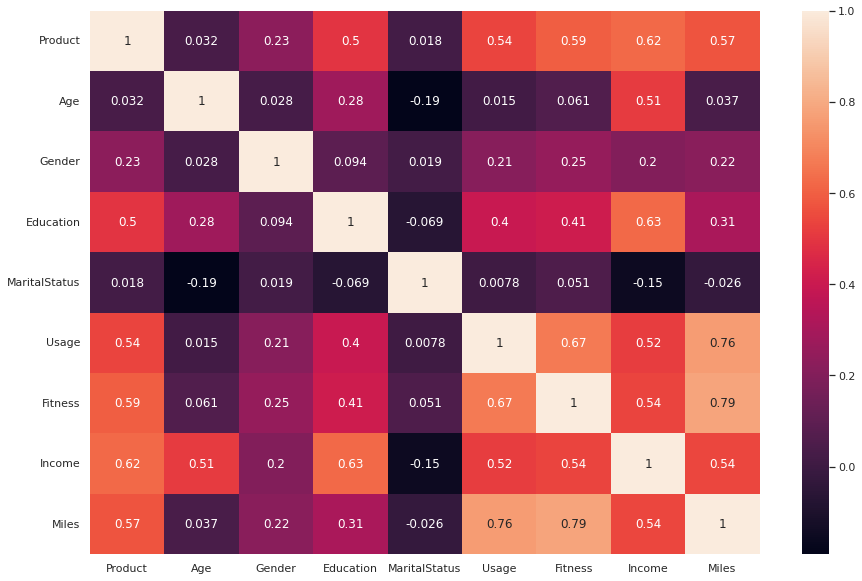

In [16]:
sns.heatmap(df.corr(),annot=True)

### Studying some of the more highly correlated features

### Fitness vs Miles with Usage

<AxesSubplot:xlabel='Fitness', ylabel='Miles'>

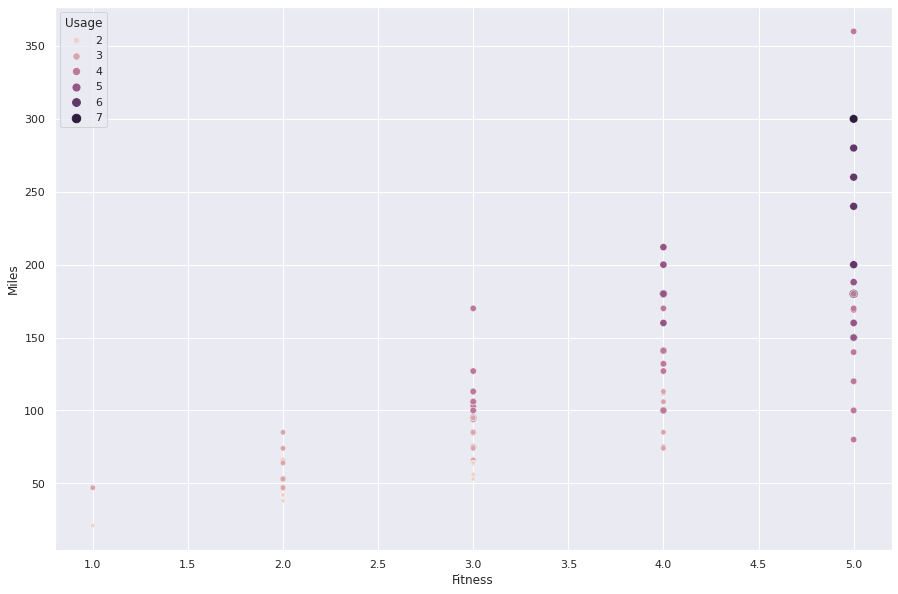

In [17]:
sns.scatterplot(data=df, x="Fitness", y="Miles", hue="Usage", size="Usage")

#### As we can probably assume from the beginning, those with a lower self-declared fitness level would run lesser miles.
#### Furthermore, we observed earlier that most of the responses were from those identifing as fitness level 3. These people seemed to be constant about how much they run.
#### On the otherhand, although those with fitness level 5 had fewer responses, they span a larger range of running miles and we can even see some extreme cases. 
#### **Ignoring some of these outliers, we can account for the general knowledge that those with a great fitness level would run longer on the treadmill**

#### Additionally, we can also observe the trends in usages. 
#### Those with a fitness level of 3 or lower has usages around 4 or lower.
#### We only start to see those using the product more often throughout the week when their fitness level increaes to 4 and to 5. 
#### This also reinforces our idea that those with a higher fitness level would most likely be using it more often, boosting up their fitness level. 
#### **OR** they can be using it more often, since they have a higher fitness level and could use the product the very next day. 
#### The causational relation is not defined here and hard to justify with these data. 
#### But, we also do need to note that the usage data distribution is biased and does not equally represent those using it 6 or more days a week. 
#### This may show an incomplete picture of those who frequently uses this product, calling for a more inclusive survey. 
#### **However, we can still argue that those with a higher fitness level are more likely to be using the product throughout the week**

### Education vs Income

<AxesSubplot:xlabel='Education', ylabel='Income'>

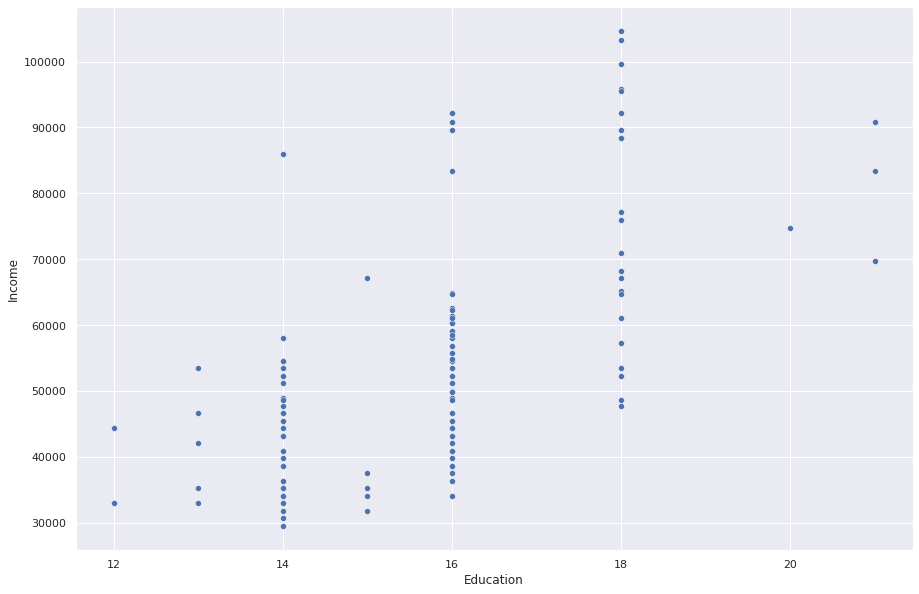

In [18]:
sns.scatterplot(data=df, x="Education", y="Income")

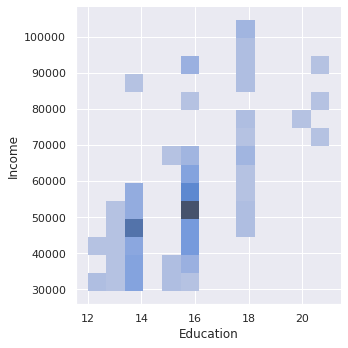

In [19]:
sns.displot(data=df, x="Education", y="Income")

#### This relational study has not much to do with the product engagement with the customers but just goes on to show the relation between education and income.
#### The common belief is that the higher one's education is, the greater one's income. 
#### This dataset lacks in both breath and depth as it only has 180 datapoints and the education variable is only limited to the number of years one has been studing and doesn't tell much about the quality and the details of the education they received.
#### However, from this brief observation, we can observe that with a longer period of education, these users tend to earn more as seen. 
#### It would also be difficult to obtain users with education of more than 18 years as there are a lesser proportion of these people in the population itself. 
#### **However, we can still agree that education is positively correlated with income levels**

### Usage vs Income

#### This is an important study to look at for the stackholders of this company. 
#### The study of this relationship might determine whether we are targetting the correct subset of the population with regards to their income.
#### It would have been more beneficial if we knew details about the products and possibly their details such as price.
#### With these information, we can take a closer look into how our different models have been performing with users from different income levels. 
#### Since treadmill is a **price elastic** product, it would be paramount to be correctly targetting users with the appropriate income levels. 

<AxesSubplot:xlabel='Usage', ylabel='Income'>

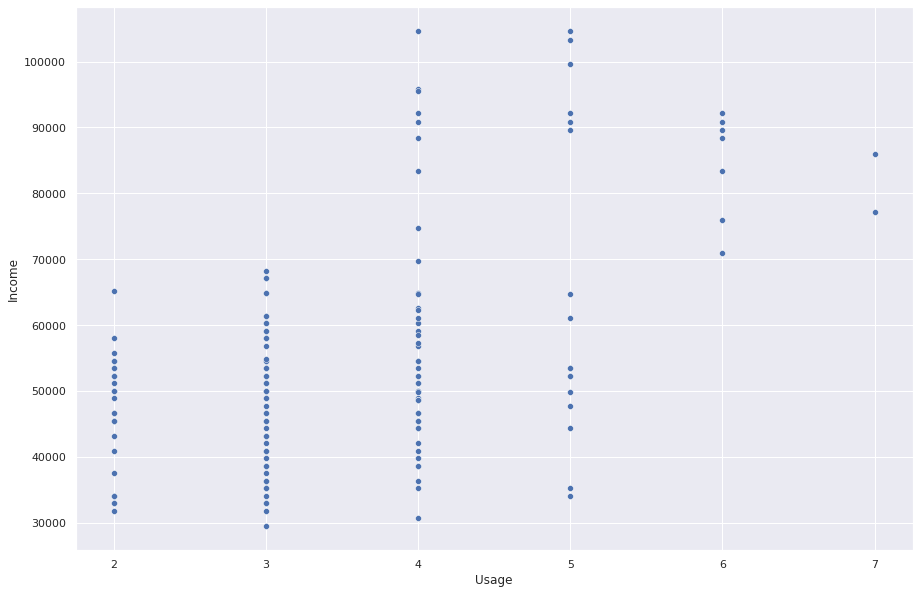

In [20]:
sns.scatterplot(data=df, x="Usage", y="Income")

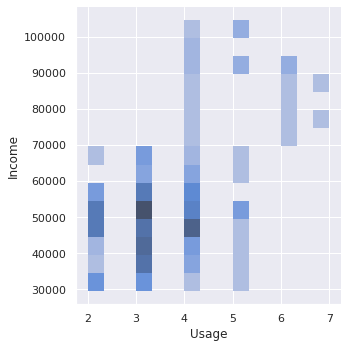

In [21]:
sns.displot(data=df, x="Usage", y="Income")

#### This plot doesn't reflect much information as shown by the low correlation figures in the above heatmap. 
#### However, some information we can possibly salvage from this plot is that those with a usually lower usage are in the lower income bracket.
#### These maybe due to the fact that they are younger and therefore are busy with their career and life to the point that they do not have much time to use the product. 
#### This begs the question as to what the relation between age and usage would look like. 

### Age vs Usage

<AxesSubplot:xlabel='Usage', ylabel='Age'>

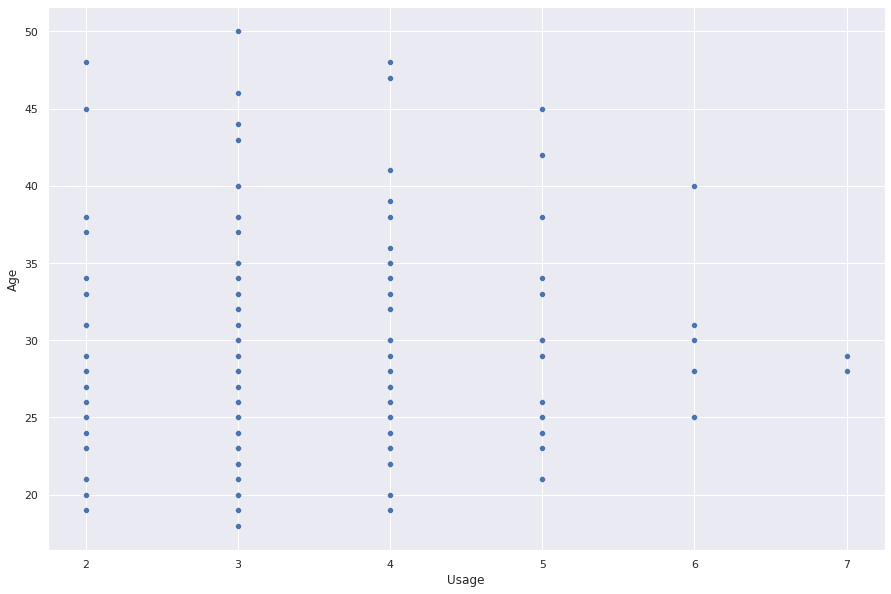

In [22]:
sns.scatterplot(data=df, x="Usage", y="Age")

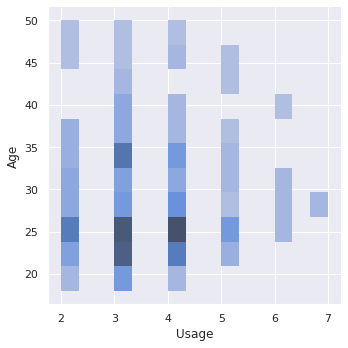

In [23]:
sns.displot(data=df, x="Usage", y="Age")

#### From this single plot, we can already see that the younger people are the ones who are less likely to frequent the machine compared to the older people. 
#### The plot shows a higher density of younger people who have a lower figure of usage. 
#### The older people on the other hand also tend to use the machine around 2 to 4 times a week only and this can be due to the fact that a treadmill requires a high fitness level and most of our older users may not be as fit as the younger ones.

# Conclusion

#### With a very limited dataset of only 180 datapoints and a biased dataset, we have reached several possible conclusions. 
#### However, these conclusions are meant to be taken with a pinch of salt as they lack both quality and accuracy.
#### They are not based on equal, unbiased data and they do not have other high quality information about the product nor the users.

#### I hope this simple visualization notebook has shown you what the seaborn library is capable of and hope you could try it out to on more elaborate datasets to fork out more detailed relationships.
#### Thank you!